# 線性分類-邏輯斯回歸(Logistic Regression)

> Perceptron 的缺點：只能知道預測結果是A還是B，沒辦法知道是A、是B的**機率**是多少

## LG是分類演算法，不是回歸演算法

w0*x0+w1*x1+…+wn*xn 值變成機率分佈 

負無限大~正無限大，對應到0~1

## Sigmoid函數，也稱為logistic function
其他的函數也可以使用
其實也可以改用其他符合0~1的函數（因為機率的值是介於0~1）

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)


## 縮小範圍，把資料標準化

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from IPython.display import Math
Math(r'z=w^Tx')
Math(r'\phi{(z)}=\frac{1}{1+e^{-z}}')

<IPython.core.display.Math object>

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()
lr.fit(X_train_std,y_train['target'].values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 視覺化

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

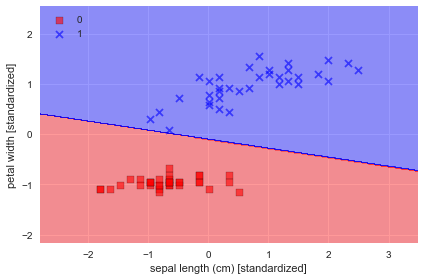

In [14]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=lr)
plt.xlabel('sepal length (cm) [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 預測

In [15]:
lr.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1])

In [16]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1])

In [17]:
error = 0
for i, v in enumerate(lr.predict(X_test_std)):
    if v != y_test['target'].values[i]:
        error+=1
print(error)

0


## 大於0.5預測成1 小於0.5預測成0

In [18]:
lr.predict_proba(X_test_std)

array([[ 0.93978177,  0.06021823],
       [ 0.005938  ,  0.994062  ],
       [ 0.97412756,  0.02587244],
       [ 0.0212674 ,  0.9787326 ],
       [ 0.0119407 ,  0.9880593 ],
       [ 0.32159479,  0.67840521],
       [ 0.95312111,  0.04687889],
       [ 0.0100283 ,  0.9899717 ],
       [ 0.00867294,  0.99132706],
       [ 0.03869904,  0.96130096],
       [ 0.06752495,  0.93247505],
       [ 0.05267873,  0.94732127],
       [ 0.01641248,  0.98358752],
       [ 0.98776985,  0.01223015],
       [ 0.95041495,  0.04958505],
       [ 0.94900694,  0.05099306],
       [ 0.98704203,  0.01295797],
       [ 0.9094647 ,  0.0905353 ],
       [ 0.93811592,  0.06188408],
       [ 0.97556281,  0.02443719],
       [ 0.93978177,  0.06021823],
       [ 0.04455382,  0.95544618],
       [ 0.96461079,  0.03538921],
       [ 0.04095329,  0.95904671],
       [ 0.96560356,  0.03439644],
       [ 0.93638206,  0.06361794],
       [ 0.97099504,  0.02900496],
       [ 0.04711351,  0.95288649],
       [ 0.06393071,